# System functions

## Environment variables

Environment variables are variables defined in the operating environment. Users can modify these to control behavior of applications and software. In Python the dirctionary os.environ contains these variables.

In [ ]:
import os

print(os.environ["PATH"])

for variable in os.environ:
    print("%s = %s" % (variable, os.environ[variable]))

os.environ["TEST"] = "Nytt värde"
print(os.environ["TEST"])

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
NV_LIBCUBLAS_DEV_VERSION = 11.3.0.106-1
NV_CUDA_COMPAT_PACKAGE = cuda-compat-11-1
NV_CUDNN_PACKAGE_DEV = libcudnn8-dev=8.0.5.39-1+cuda11.1
LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
NV_LIBNCCL_DEV_PACKAGE = libnccl-dev=2.8.4-1+cuda11.1
CLOUDSDK_PYTHON = python3
LANG = en_US.UTF-8
NV_LIBNPP_DEV_PACKAGE = libnpp-dev-11-1=11.1.2.301-1
HOSTNAME = 8dcc7b96e000
OLDPWD = /
CLOUDSDK_CONFIG = /content/.config
NV_LIBNPP_VERSION = 11.1.2.301-1
NV_NVPROF_DEV_PACKAGE = cuda-nvprof-11-1=11.1.105-1
NVIDIA_VISIBLE_DEVICES = all
NV_NVPROF_VERSION = 11.1.105-1
NV_LIBCUSPARSE_VERSION = 11.3.0.10-1
DATALAB_SETTINGS_OVERRIDES = {"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=172.28.0.2"],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}
NV_LIBCUBLAS_DEV_PACKAGE

## Accessing the system path

The system path controls how the operating system searches for executables in the file system. Python has a neutral way of querying these from the system.

In [ ]:
import os

exe_path_list = os.get_exec_path()

for path in exe_path_list:
    print(path)

/opt/bin
/usr/local/nvidia/bin
/usr/local/cuda/bin
/usr/local/sbin
/usr/local/bin
/usr/sbin
/usr/bin
/sbin
/bin
/tools/node/bin
/tools/google-cloud-sdk/bin


## Changing and querying the working directory

The working directory is the directory where your application is started. Python has functions for changing and querying the working directory.

In [ ]:
import os

cwd = os.getcwd()
print(cwd)

os.chdir("..")
print(os.getcwd())
os.chdir(cwd)
print(os.getcwd())

/content
/
/content


## Listing files in a directory

For many applications it can be important to query what files and directories are available. The os.listdir() function implements this in Python.

In [ ]:
!touch testfile

In [ ]:
import os

for item in os.listdir():
    print(item)

for item in os.listdir():
    if os.path.isdir(item):
        print("Katalog:", item)
    if os.path.isfile(item):
        print("Fil    :", item)

.config
testfile
sample_data
Katalog: .config
Fil    : testfile
Katalog: sample_data


## Directory manipulation

Python also has a lot of functions for creating and manipulating directories.

In [ ]:
import os

cwd = os.getcwd()

if not os.path.exists("os5"):
    os.mkdir("os5")

os.chdir("os5")

os.mkdir("testdir")

with open("testfile", "w") as f:
    f.write("testfile")

print(os.listdir())

os.rename("testfile", "testfile2")

print(os.listdir())

os.rmdir("testdir")
os.remove("testfile2")

print(os.listdir())

os.chdir(cwd)

['testfile', 'testdir']
['testdir', 'testfile2']
[]


## Listing and querying file information

The os.scandir() function can be used to query more detailed information on the a file or directory.

In [ ]:
import os

with os.scandir() as it:
    for entry in it:
        print("------------------------")
        print("name", entry.name)
        print("path", entry.path)
        print("is_dir", entry.is_dir())
        print("is_file", entry.is_file())

------------------------
name .config
path ./.config
is_dir True
is_file False
------------------------
name os5
path ./os5
is_dir True
is_file False
------------------------
name testfile
path ./testfile
is_dir False
is_file True
------------------------
name sample_data
path ./sample_data
is_dir True
is_file False


## Walking directories with os.walk()

The os.walk() function enables you to traverse directories as an iteration using the for-statement.

In [ ]:
import os

for root, dirs, files in os.walk("."):
    print("--->")
    print(root)
    print(dirs)
    print(files)
    print("<---")

--->
.
['.config', 'os5', 'sample_data']
['testfile']
<---
--->
./.config
['logs', 'configurations']
['.last_update_check.json', 'active_config', '.last_survey_prompt.yaml', 'config_sentinel', 'gce', '.last_opt_in_prompt.yaml']
<---
--->
./.config/logs
['2022.08.31']
[]
<---
--->
./.config/logs/2022.08.31
[]
['13.47.33.413502.log', '13.47.03.944288.log', '13.46.43.989608.log', '13.46.22.077074.log', '13.47.11.927057.log', '13.47.32.611835.log']
<---
--->
./.config/configurations
[]
['config_default']
<---
--->
./os5
[]
[]
<---
--->
./sample_data
[]
['README.md', 'anscombe.json', 'california_housing_train.csv', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_test.csv']
<---


## Querying file information

On Unix-based platform the os.stat() function can return detailed information on files and directories.

In [ ]:
import os

with open("testfile", "w") as f:
    f.write("testfile")
    
os.mkdir("testdir2")

statinfo_file = os.stat("testfile")
statinfo_dir = os.stat("testdir2")

print(statinfo_file)
print(statinfo_dir)

os.stat_result(st_mode=33188, st_ino=3932259, st_dev=38, st_nlink=1, st_uid=0, st_gid=0, st_size=8, st_atime=1662376865, st_mtime=1662377097, st_ctime=1662377097)
os.stat_result(st_mode=16877, st_ino=3932262, st_dev=38, st_nlink=2, st_uid=0, st_gid=0, st_size=4096, st_atime=1662377097, st_mtime=1662377097, st_ctime=1662377097)


## Path manipulation

The os.path module contains even more functions for manipulating paths and querying file information.

In [ ]:
import os

print(os.path.abspath('.'))
print(os.path.basename('/home/user/test.txt'))
print(os.path.dirname('/home/user/test.txt'))

with open("testfile_path", "w") as f:
    f.write("testfile")

if os.path.exists('/home/user/test.txt'):
    print('test.txt is valid')
else:
    print('test.txt is not valid')

print(os.path.expanduser('~'))

print(os.path.getatime('testfile_path'))
print(os.path.getmtime('testfile_path'))
print(os.path.getctime('testfile_path'))

print(os.path.getsize('testfile_path'))

if os.path.isabs('testfile_path'):
    print('Absolute path')
else:
    print('No absolute path')

if os.path.isabs("C:/Users/jonas/Development/python_book/examples/rtl/ospath1.py"):
    print('Absolute path')
else:
    print('No absolute path')

if os.path.isfile('testfile_path'):
    print('ospath1.py is a file')
else:
    print('ospath1.py is not a file')

if os.path.isdir('testfile_path'):
    print('ospath1.py is a directory')
else:
    print('ospath1.py is not a directory')

dir_name = 'c:\\Users\\jonas'
file_name = 'test.txt'

file_path = os.path.join(dir_name, file_name)

print(file_path)
print(os.path.split(file_path))
print(os.path.splitdrive(file_path))
print(os.path.splitext(file_path))

/content
test.txt
/home/user
test.txt is not valid
/root
1662377281.611487
1662377281.612487
1662377281.612487
8
No absolute path
No absolute path
ospath1.py is a file
ospath1.py is not a directory
c:\Users\jonas/test.txt
('c:\\Users\\jonas', 'test.txt')
('', 'c:\\Users\\jonas/test.txt')
('c:\\Users\\jonas/test', '.txt')


## Path manipulation using pathlib

pathlib is a module implemting OO-based file manipulation.

In [ ]:
import pathlib as pl

p = pl.Path('.')
p = p / "test"
print(p)

print(p.exists())

q = p.resolve()
print(q)


print(q.parts)
print(q.drive)

r = pl.Path.cwd()
print(r)

print(r.exists())
print(r.is_dir())
print(r.is_file())


s = pl.Path.home()
print(s)

## Iterating with pathlib

In [ ]:
import pathlib as pl

p = pl.Path(".")

for x in p.iterdir():
    if x.is_dir():
        print(x,'- katalog')
    else:
        print(x,'- fil')

## Current path manipulation using pathlib

In [ ]:
import os
import pathlib as pl

p = pl.Path('..')

os.chdir(p)

q = pl.Path.cwd()
print(q)

In [ ]:
import os
import pathlib as pl

new_path = pl.Path('..')
old_path = pl.Path.cwd()

os.chdir(new_path)

print(pl.Path.cwd())

os.chdir(old_path)

print(pl.Path.cwd())

## Temporary files

In many applications you need to create temporary files. In Python there are functions for securely creating temporary files.

In [ ]:
import os, tempfile

temp_fd, temp_path = tempfile.mkstemp()

print('Temporär fil', temp_path, 'skapad.')
print('Är det en faktiskt fil:', os.path.isfile(temp_path))

try:
    with open(temp_fd, 'w+t') as temp_file:
        temp_file = open(temp_fd, 'w+t')
        temp_file.write('this is written to the temp file')
        temp_file.seek(0)
        print(temp_file.read())
finally:
    os.remove(temp_path)

print(os.path.isfile(temp_path))

Temporär fil /tmp/tmpav9qb_s9 skapad.
Är det en faktiskt fil: True
this is written to the temp file
False


In [ ]:
import os, tempfile

with tempfile.TemporaryFile() as temp_file:
    print('Temporär fil', temp_file.name, 'skapad.')
    print(os.path.isfile(temp_file.name))
    temp_file.write(b'this is written to the temp file')
    temp_file.seek(0)

print(os.path.isfile(temp_file.name))

Temporär fil 59 skapad.
True
False


# Starting other programs from Python

## Starting program using the subprocess module

In many cases there is a need for a Python script to execute other applications and scripts. Python implements a multitude of functions for executing processes. Most of them are implemented in the subprocess module.

In [ ]:
import subprocess

result = subprocess.run(['ls', '-la'])

if result.returncode == 0:
    print('Processen returnerade 0')
else:
    print('Processen returnerade felkoden = ', result.returncode)

Processen returnerade 0


In [ ]:
import subprocess

result = subprocess.run('ls -la', shell=True, stdout=subprocess.PIPE, universal_newlines=True)

if result.returncode == 0:
    print('Processen returnerade 0')
    print('Utdata:')
    print(result.stdout)
else:
    print('Processen returnerade felkoden = ', result.returncode)

Processen returnerade 0
Utdata:
total 32
drwxr-xr-x 1 root root 4096 Sep  5 11:28 .
drwxr-xr-x 1 root root 4096 Sep  5 11:07 ..
drwxr-xr-x 4 root root 4096 Aug 31 13:47 .config
drwxr-xr-x 2 root root 4096 Sep  5 11:23 os5
drwxr-xr-x 1 root root 4096 Aug 31 13:47 sample_data
drwxr-xr-x 2 root root 4096 Sep  5 11:24 testdir2
-rw-r--r-- 1 root root    8 Sep  5 11:24 testfile
-rw-r--r-- 1 root root    8 Sep  5 11:28 testfile_path



In [ ]:
import subprocess

p = subprocess.Popen(['ls', '-la'])

# Other processing here...

p.wait()

if p.returncode == 0:
    print('Processen returnerade 0')
else:
    print('Processen returnerade felkoden = ', p.returncode)

Processen returnerade 0


In [ ]:
import subprocess, time

p = subprocess.Popen(['sleep', '5'])

while p.poll() is None:
    print('Väntar...')
    time.sleep(1)

if p.returncode == 0:
    print('Processen returnerade 0')
else:
    print('Processen returnerade felkoden = ', p.returncode)

Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Processen returnerade 0


In [ ]:
import subprocess, time

p = subprocess.Popen('ls -la; sleep 4', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)

while p.poll() is None:
    print('Väntar...')
    time.sleep(1)

stdout, stderr = p.communicate()

if p.returncode == 0:
    print('Processen returnerade 0')
    print('standard output:')
    print(stdout)
    print('standard error:')
    print(stderr)
else:
    print('Processen returnerade felkoden = ', p.returncode)

Väntar...
Väntar...
Väntar...
Väntar...
Väntar...
Processen returnerade 0
standard output:

standard error:
/bin/sh: 1: lsu: not found



In [ ]:
import subprocess

with subprocess.Popen('ls -la', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True) as p:
    stdout, stderr = p.communicate()

    if p.returncode == 0:
        print('Processen returnerade 0')
        print('standard output:')
        print(stdout)
        print('standard error:')
        print(stderr)
    else:
        print('Processen returnerade felkoden = ', p.returncode)

Processen returnerade 0
standard output:
total 32
drwxr-xr-x 1 root root 4096 Sep  5 11:28 .
drwxr-xr-x 1 root root 4096 Sep  5 11:07 ..
drwxr-xr-x 4 root root 4096 Aug 31 13:47 .config
drwxr-xr-x 2 root root 4096 Sep  5 11:23 os5
drwxr-xr-x 1 root root 4096 Aug 31 13:47 sample_data
drwxr-xr-x 2 root root 4096 Sep  5 11:24 testdir2
-rw-r--r-- 1 root root    8 Sep  5 11:24 testfile
-rw-r--r-- 1 root root    8 Sep  5 11:28 testfile_path

standard error:



In [ ]:
import subprocess


def execute_with_output(cmd):

    with subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, universal_newlines=True) as p:
        stdout, _ = p.communicate()

        if p.returncode == 0:
            return stdout
        else:
            return None


if __name__ == "__main__":

    output = execute_with_output('ls')

    if output is not None:

        lines = output.split("\n")

        for line in lines:
            print('>' + line)
    else:
        print('Ingen utdata returnerades.')

>os5
>sample_data
>testdir2
>testfile
>testfile_path
>


# Structured logging of events

For larger applications there is often a need to create log entries in a more structured way. The logging module in Python implements this functionality.

In [ ]:
import logging

def do_some_logging():
    logging.debug("Detta är ett testmeddelande...")
    logging.info("Detta är ett informationsmeddelande...")
    logging.warning("Detta är en varning...")
    logging.error("Detta är ett felmeddelande...")
    logging.critical("Detta är ett kritiskt fel...")
    logging.critical("-----------------------------")

#logging.getLogger().setLevel(logging.DEBUG)

#do_some_logging()

logging.getLogger().setLevel(logging.ERROR)

do_some_logging()

ERROR:root:Detta är ett felmeddelande...
CRITICAL:root:Detta är ett kritiskt fel...
CRITICAL:root:-----------------------------


In [ ]:
import logging

def do_some_logging2(logger):
    logger.debug("Detta är ett testmeddelande...")
    logger.info("Detta är ett informationsmeddelande...")
    logger.warning("Detta är en varning...")
    logger.error("Detta är ett felmeddelande...")
    logger.critical("Detta är ett kritiskt fel...")
    logger.critical("-----------------------------")


mylog = logging.getLogger("mylog")
mylog.setLevel(logging.DEBUG)

do_some_logging2(mylog)

print("Loglevel ERROR")

mylog.setLevel(logging.ERROR)

do_some_logging2(mylog)

In [ ]:
import logging

def do_some_logging(logger):
    logger.debug("Detta är ett testmeddelande...")
    logger.info("Detta är ett informationsmeddelande...")
    logger.warning("Detta är en varning...")
    logger.error("Detta är ett felmeddelande...")
    logger.critical("Detta är ett kritiskt fel...")

logging.basicConfig(level=logging.DEBUG, format='%(asctime)-15s %(name)-10s %(levelname)-8s %(message)s')

mylog = logging.getLogger("mylog")
mylog.setLevel(logging.DEBUG)

do_some_logging(mylog)

DEBUG:mylog:Detta är ett testmeddelande...
INFO:mylog:Detta är ett informationsmeddelande...
ERROR:mylog:Detta är ett felmeddelande...
CRITICAL:mylog:Detta är ett kritiskt fel...


In [ ]:
def my_func2(p1):
    print("my_func2() p1=", p1)

    if p1 < 0:
        print("p1 mindre än 0")

def my_func1(p1):
    print("my_func() p1 =", p1)
    my_func2(p1)

    for i in range(5):
        print("i =", i)

my_func1(-2)
my_func1(1)

# Storing variables and data structures

Python has built in functions for writing data types to disk. If readability is important the Javascript Object Notation or json can be used as a storage format. In Python this functionality is found in the json-module.

In [ ]:
import json

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

with open("mydata.json", "w") as my_file:
    json.dump(my_data, my_file)

with open("mydata.json", "r") as my_file:
    my_data_copy = json.load(my_file)

print(my_data_copy)
!cat mydata.json

{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}
{"a number": 42, "a list": [1, 2, 3, 4], "a dict": {"a": 1, "b": 2}}

In [ ]:
import json

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

json_string = json.dumps(my_data)

print(json_string)

my_data_copy = json.loads(json_string)

print(my_data_copy)

{"a number": 42, "a list": [1, 2, 3, 4], "a dict": {"a": 1, "b": 2}}
{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}


In [ ]:
import json

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

print(json.dumps(my_data, sort_keys=True, indent=4))

{
    "a dict": {
        "a": 1,
        "b": 2
    },
    "a list": [
        1,
        2,
        3,
        4
    ],
    "a number": 42
}


## Storing data structures using the standard pickle-format

The pickle-module is the standard way of storing Python data types in Python. It is used in the same way as the json-module.

In [ ]:
import pickle

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

with open("my_data.pkl", "wb") as my_file:
    pickle.dump(my_data, my_file)

with open("my_data.pkl", "rb") as my_file:
    my_data_copy = pickle.load(my_file)

print(my_data_copy)

{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}


In [ ]:
import pickle

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

with open("my_data_text.pkl", "wb") as my_file:
    pickle.dump(my_data, my_file, protocol=0)

with open("my_data_text.pkl", "rb") as my_file:
    my_data_copy = pickle.load(my_file)

print(my_data_copy)

In [ ]:
import pickle

my_data = {"a number": 42, "a list": [1, 2, 3, 4], "a dict": {'a': 1, 'b': 2}}

my_data_dump = pickle.dumps(my_data)

print(my_data_dump)

my_data_copy = pickle.loads(my_data_dump)

print(my_data_copy)

b'\x80\x03}q\x00(X\x08\x00\x00\x00a numberq\x01K*X\x06\x00\x00\x00a listq\x02]q\x03(K\x01K\x02K\x03K\x04eX\x06\x00\x00\x00a dictq\x04}q\x05(X\x01\x00\x00\x00aq\x06K\x01X\x01\x00\x00\x00bq\x07K\x02uu.'
{'a number': 42, 'a list': [1, 2, 3, 4], 'a dict': {'a': 1, 'b': 2}}


# Data archiving and compression

## Tarfiles

In [ ]:
!wget https://fossbytes.com/wp-content/uploads/2016/10/commodore64.jpg -O bild1.jpg

--2022-09-05 11:52:21--  https://fossbytes.com/wp-content/uploads/2016/10/commodore64.jpg
Resolving fossbytes.com (fossbytes.com)... 104.21.28.5, 172.67.170.30, 2606:4700:3031::ac43:aa1e, ...
Connecting to fossbytes.com (fossbytes.com)|104.21.28.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73687 (72K) [image/jpeg]
Saving to: ‘bild1.jpg’

bild1.jpg           100%[===================>]  71.96K  --.-KB/s    in 0.01s   

2022-09-05 11:52:21 (5.51 MB/s) - ‘bild1.jpg’ saved [73687/73687]



In [ ]:
!wget https://ichef.bbci.co.uk/news/640/media/images/68628000/jpg/_68628283_apple-1.jpg -O bild2.jpg

--2022-09-05 11:52:24--  https://ichef.bbci.co.uk/news/640/media/images/68628000/jpg/_68628283_apple-1.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.197.20.140, 2600:1408:5400:58d::f33, 2600:1408:5400:591::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.197.20.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from ichef.bbci.co.uk attempted to set domain to bbc.co.uk
Length: 45249 (44K) [image/jpeg]
Saving to: ‘bild2.jpg’

bild2.jpg           100%[===================>]  44.19K  --.-KB/s    in 0.03s   

2022-09-05 11:52:24 (1.28 MB/s) - ‘bild2.jpg’ saved [45249/45249]



In [ ]:
import tarfile as tf

with tf.TarFile("myarchive.tar.gz", "w") as mytar:
    mytar.add("bild1.jpg")
    mytar.add("bild2.jpg")

with tf.TarFile("myarchive.tar.gz", "r") as mytar:
    print(mytar.getnames())
    print(mytar.getmembers())
    mytar.extract("bild1.jpg", "mytar")
    mytar.extractall("mytar_all")
    mytar.list(verbose=True)

['bild1.jpg', 'bild2.jpg']
[<TarInfo 'bild1.jpg' at 0x7f2a51419530>, <TarInfo 'bild2.jpg' at 0x7f2a51419c80>]
?rw-r--r-- root/root      73687 2016-10-01 12:24:24 bild1.jpg 
?rw-r--r-- root/root      45249 2022-09-05 11:52:24 bild2.jpg 


In [ ]:
!ls

bild1.jpg  myarchive.tar.gz  my_data.pkl  mytar_all  sample_data  testfile
bild2.jpg  mydata.json	     mytar	  os5	     testdir2	  testfile_path


## Zip-files

['bild1.jpg', 'bild2.jpg']
<ZipInfo filename='bild1.jpg' filemode='-rw-r--r--' file_size=73687>
File Name                                             Modified             Size
bild1.jpg                                      2016-10-01 12:24:24        73687
bild2.jpg                                      2022-09-05 11:52:24        45249


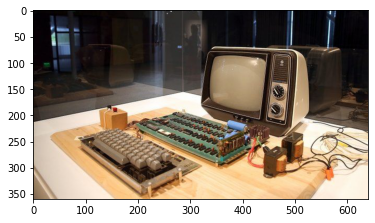

In [ ]:
import zipfile as zf
import matplotlib.pyplot as plt

with zf.ZipFile("myarchive.zip", "w") as myzip:
    myzip.write("bild1.jpg")
    myzip.write("bild2.jpg")

with zf.ZipFile("myarchive.zip", "r") as myzip:
    print(myzip.namelist())
    print(myzip.getinfo("bild1.jpg"))
    myzip.extract("bild2.jpg", "myzip")
    myzip.extractall("myzip_all")
    myzip.printdir()
    with myzip.open("bild1.jpg") as myfile:
        image1 = plt.imread(myfile)        
    with myzip.open("bild2.jpg") as myfile:
        image2 = plt.imread(myfile)        
    plt.imshow(image1)
    plt.imshow(image2)
    plt.show()

## Pickle files

In [ ]:
import pickle, zlib

my_data = {"a number": 42, "a list": list(range(1000)), "a dict": {'a': 1, 'b': 2}}

my_data_dump = pickle.dumps(my_data)
print(len(my_data_dump))

my_data_compressed = zlib.compress(my_data_dump)
print(len(my_data_compressed))

my_data_uncompressed = zlib.decompress(my_data_compressed)

my_data_copy = pickle.loads(my_data_uncompressed)
print(my_data_copy)

2825
1926
{'a number': 42, 'a list': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

## JSON files

In [ ]:
import json

my_data = {"a number": 42, "a list": list(range(1000)), "a dict": {'a': 1, 'b': 2}}

my_data_dump = json.dumps(my_data)
print(len(my_data_dump))

my_data_copy = json.loads(my_data_dump)
print(my_data_copy)

with open("mydata.json", "w") as json_file:
    json.dump(my_data, json_file)

with open("mydata.json", "r") as json_file:
    my_data_copy = json.load(json_file)

In [ ]:
!ls
!cat mydata.json

# Special file formats

## Configuration files

In [ ]:
config_file = """[DEFAULT]
ServerAliveInterval = 45
Compression = yes
CompressionLevel = 9
ForwardX11 = yes

[bitbucket.org]
User = hg

[topsecret.server.com]
Port = 50022
ForwardX11 = no"""


with open("config1.ini", "w") as f:
    f.write(config_file)
    
import configparser

config = configparser.ConfigParser()
config.read("config1.ini")

sections = config.sections()
print(sections)

print(config["bitbucket.org"]["user"])

for section in config.sections():
    print("section =", section)
    keys = config[section].keys()
    for key in keys:
        print(key, "=", config[section][key])
        
config["bitbucket.org"]["user"] = "jonas"
print(config["bitbucket.org"]["user"])

with open("config2.ini", "w") as config_file:
    config.write(config_file)

['bitbucket.org', 'topsecret.server.com']
hg
section = bitbucket.org
user = hg
serveraliveinterval = 45
compression = yes
compressionlevel = 9
forwardx11 = yes
section = topsecret.server.com
port = 50022
forwardx11 = no
serveraliveinterval = 45
compression = yes
compressionlevel = 9
jonas


In [ ]:

import configparser

config = configparser.ConfigParser()

config["DEFAULT"] = {
        "Rating":"No rating",
        "Length":"No length"
        }

config["Dr Who"] = {"Rating":"9/9"}
config["Firefly"] = {"Length":"Too long"}

with open("config3.ini", "w") as config_file:
    config.write(config_file)
    

In [ ]:
!cat config3.ini

## Comma separated files - CSV

In [ ]:
!rm example1.csv
!wget https://raw.githubusercontent.com/jonaslindemann/guide_to_python/master/chapters/kapitel4/notebook/example1.csv

rm: cannot remove 'example1.csv': No such file or directory
--2022-09-05 12:00:04--  https://raw.githubusercontent.com/jonaslindemann/guide_to_python/master/chapters/kapitel4/notebook/example1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256 [text/plain]
Saving to: ‘example1.csv’

example1.csv        100%[===================>]     256  --.-KB/s    in 0s      

2022-09-05 12:00:04 (10.7 MB/s) - ‘example1.csv’ saved [256/256]



In [ ]:
import csv

with open('example1.csv', 'r') as csv_file:
    csv_data = csv.reader(csv_file, delimiter=',')
    for row in csv_data:
        print(row)

with open('example2.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(['Beteckning', 'Antal'])
    csv_writer.writerow(['Gurka', '2'])
    csv_writer.writerow(['Tomat', '4'])
    
l = [["Beteckning", "Antal"],["Gurka", "2"], ["Tomat", "4"]]

with open('example3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerows(l)

['Year', 'Make', 'Model', 'Description', 'Price']
['1997', 'Ford', 'E350', 'ac, abs, moon', '3000.00']
['1999', 'Chevy', 'Venture "Extended Edition"', '', '4900.00']
['1999', 'Chevy', 'Venture "Extended Edition, Very Large"', '', '5000.00']
['1996', 'Jeep', 'Grand Cherokee', 'MUST SELL!air, moon roof, loaded', '4799.00']
